In [1]:
import pandas as pd

In [7]:
df = pd.read_excel('eda_inventory_dataset_batch1.xlsx')



In [10]:
df

,Product_ID,Product_Name,Category,Supplier,Purchase_Price,Sale_Price,Quantity_In_Stock,Reorder_Level,Units_On_Order,Discontinued
0,P0001,Doodad,Clothing,Supplier D,339.75,NaN,588.0,292.0,161.0,1
1,P0002,Doohickey,Clothing,Supplier C,NaN,470.14,348.0,114.0,70.0,1
2,P0003,Thingamajig,Clothing,Supplier B,NaN,460.10,146.0,NaN,163.0,1
3,P0004,Doohickey,Clothing,Supplier A,NaN,124.82,66.0,13.0,NaN,0
4,P0005,Doohickey,Toys,Supplier E,228.75,66.71,903.0,271.0,37.0,1
...,...,...,...,...,...,...,...,...,...,...
995,P0996,Gadget,Electronics,Supplier D,350.37,122.91,186.0,82.0,14.0,0
996,P0997,Widget,Toys,Supplier E,117.17,133.34,497.0,428.0,35.0,0
997,P0998,Widget,Electronics,Supplier C,301.70,241.22,441.0,72.0,62.0,0
998,P0999,Doodad,Toys,Supplier B,139.67,44.92,129.0,310.0,68.0,0


In [12]:
print(df.head(10))



  Product_ID Product_Name     Category    Supplier  Purchase_Price  \
0      P0001       Doodad     Clothing  Supplier D          339.75   
1      P0002    Doohickey     Clothing  Supplier C             NaN   
2      P0003  Thingamajig     Clothing  Supplier B             NaN   
3      P0004    Doohickey     Clothing  Supplier A             NaN   
4      P0005    Doohickey         Toys  Supplier E          228.75   
5      P0006       Gadget         Toys  Supplier E          401.21   
6      P0007  Thingamajig    Furniture  Supplier A          412.99   
7      P0008  Thingamajig  Electronics  Supplier A          430.21   
8      P0009  Thingamajig     Clothing  Supplier B             NaN   
9      P0010    Doohickey    Furniture  Supplier C          221.18   

   Sale_Price  Quantity_In_Stock  Reorder_Level  Units_On_Order  Discontinued  
0         NaN              588.0          292.0           161.0             1  
1      470.14              348.0          114.0            70.0      

In [14]:
print(df.dtypes)

Product_ID            object
Product_Name          object
Category              object
Supplier              object
Purchase_Price       float64
Sale_Price           float64
Quantity_In_Stock    float64
Reorder_Level        float64
Units_On_Order       float64
Discontinued           int64
dtype: object


In [41]:
summary_statistics = df.describe(include='number')
mode = df.mode().iloc[0]


In [47]:
median = df.median(numeric_only=True)


In [49]:
print("Summary Statistics:\n", summary_statistics)
print("\nMedian:\n", median)
print("\nMode:\n", mode)

Summary Statistics:
        Purchase_Price   Sale_Price  Quantity_In_Stock  Reorder_Level  \
count      801.000000   810.000000         896.000000     915.000000   
mean       251.924732   360.687049         490.196429     246.031694   
std        140.640863   475.752708         291.169649     143.636135   
min         10.010000    15.020000           0.000000       1.000000   
25%        134.020000   154.667500         224.000000     120.000000   
50%        253.790000   313.475000         497.000000     246.000000   
75%        370.900000   460.060000         734.250000     371.000000   
max        498.930000  4967.800000         998.000000     498.000000   

       Units_On_Order  Discontinued  
count      902.000000   1000.000000  
mean        97.648559      0.508000  
std         57.119825      0.500186  
min          0.000000      0.000000  
25%         48.250000      0.000000  
50%         96.000000      1.000000  
75%        147.000000      1.000000  
max        199.000000     

In [51]:
missing_values = df.isnull().sum()


In [53]:

missing_percentage = (missing_values / len(df)) * 100


In [55]:
print("Missing Values:\n", missing_values)
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values:
 Product_ID             0
Product_Name           0
Category               0
Supplier               0
Purchase_Price       199
Sale_Price           190
Quantity_In_Stock    104
Reorder_Level         85
Units_On_Order        98
Discontinued           0
dtype: int64

Percentage of Missing Values:
 Product_ID            0.0
Product_Name          0.0
Category              0.0
Supplier              0.0
Purchase_Price       19.9
Sale_Price           19.0
Quantity_In_Stock    10.4
Reorder_Level         8.5
Units_On_Order        9.8
Discontinued          0.0
dtype: float64


In [60]:
import matplotlib.pyplot as plt

In [61]:
import seaborn as sns

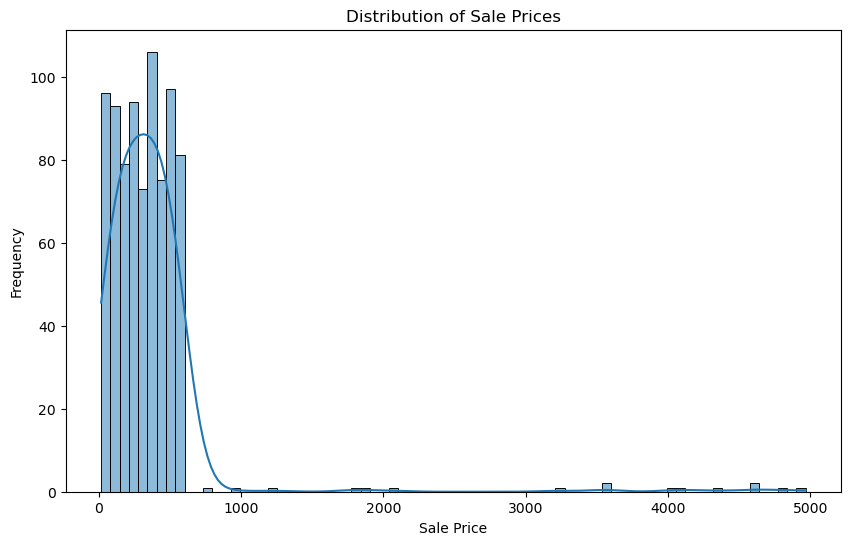

In [64]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Sale_Price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.xlabel('Sale Price')
plt.ylabel('Frequency')
plt.show()


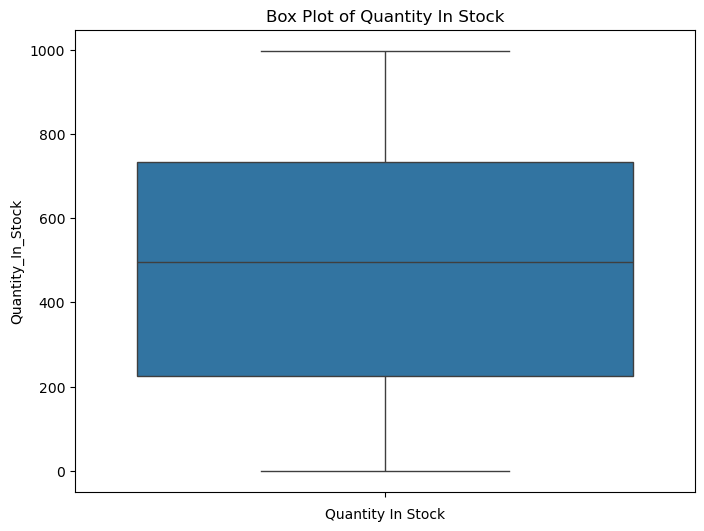

In [66]:

plt.figure(figsize=(8, 6))
sns.boxplot(df['Quantity_In_Stock'])
plt.title('Box Plot of Quantity In Stock')
plt.xlabel('Quantity In Stock')
plt.show()


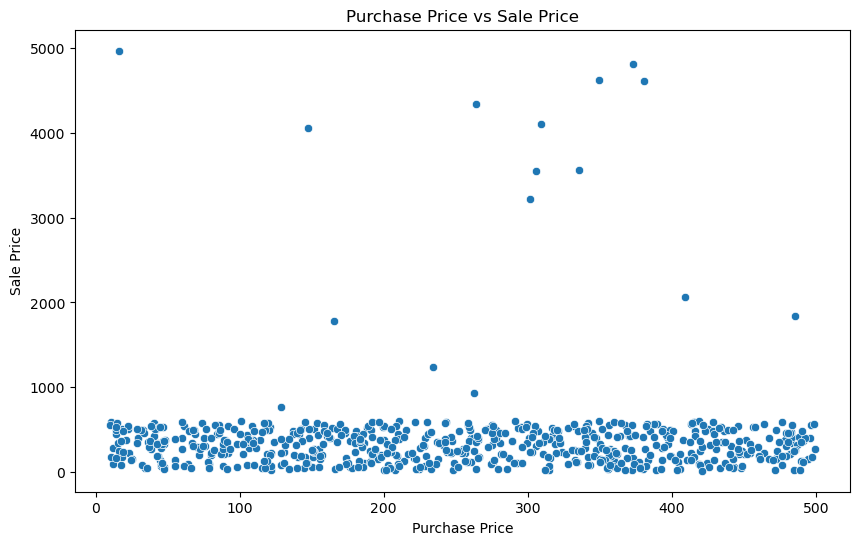

In [68]:

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Purchase_Price'], y=df['Sale_Price'])
plt.title('Purchase Price vs Sale Price')
plt.xlabel('Purchase Price')
plt.ylabel('Sale Price')
plt.show()


In [72]:

plt.figure(figsize=(12, 8))



<Figure size 1200x800 with 0 Axes>

<Figure size 1200x800 with 0 Axes>

In [76]:
correlation_matrix = summary_statistics.corr()


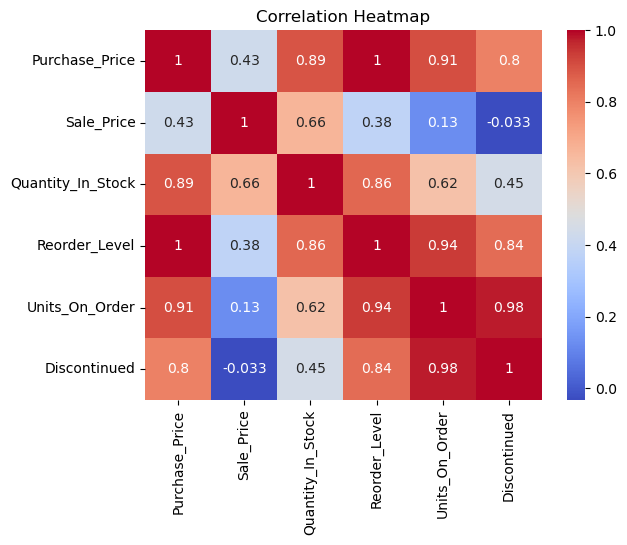

In [78]:
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [82]:
df['Purchase_Price'].fillna(df['Purchase_Price'].median())



0      339.75
1      253.79
2      253.79
3      253.79
4      228.75
        ...  
995    350.37
996    117.17
997    301.70
998    139.67
999    253.79
Name: Purchase_Price, Length: 1000, dtype: float64

In [86]:
df['Sale_Price'].fillna(df['Sale_Price'].median())

print(df[['Purchase_Price', 'Sale_Price']].isnull().sum())

Purchase_Price    0
Sale_Price        0
dtype: int64


In [90]:

Q1 = df['Sale_Price'].quantile(0.25)
Q3 = df['Sale_Price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


df_no_outliers = df[(df['Sale_Price'] >= lower_bound) & (df['Sale_Price'] <= upper_bound)]


print("Original Data Summary:\n", df['Sale_Price'].describe())
print("\nData Without Outliers Summary:\n", df_no_outliers['Sale_Price'].describe())


Original Data Summary:
 count    1000.000000
mean      351.716760
std       428.528007
min        15.020000
25%       196.950000
50%       313.475000
75%       419.195000
max      4967.800000
Name: Sale_Price, dtype: float64

Data Without Outliers Summary:
 count    984.000000
mean     306.164289
std      152.726564
min       15.020000
25%      193.500000
50%      313.475000
75%      410.512500
max      599.740000
Name: Sale_Price, dtype: float64


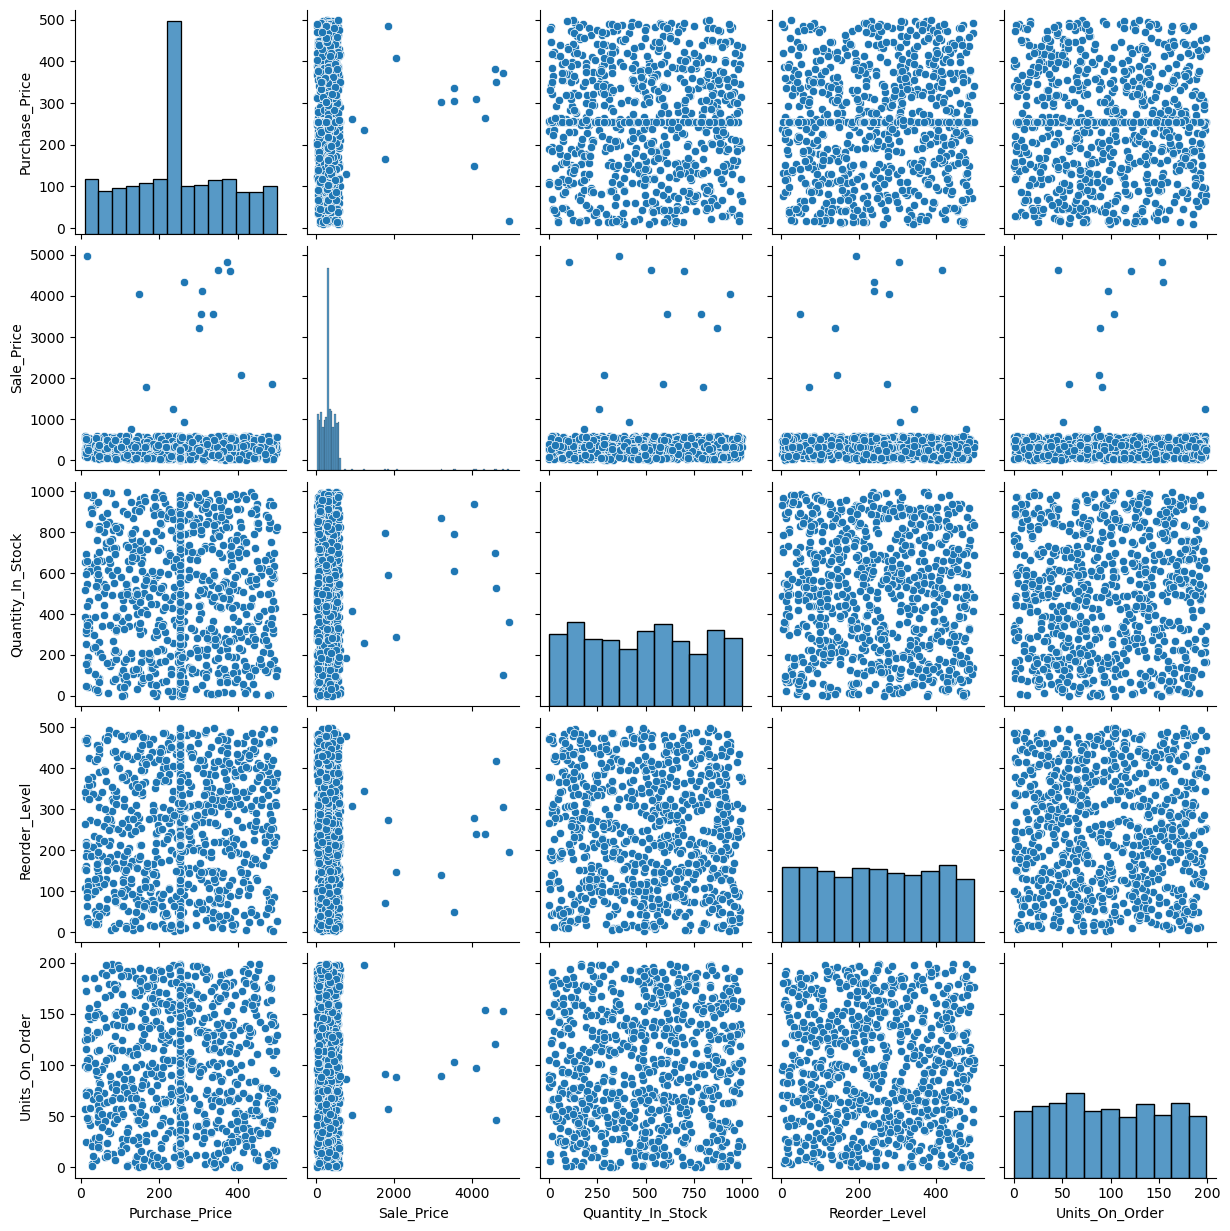

In [93]:

top_5_numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns[:5]


sns.pairplot(df[top_5_numeric_columns])
plt.show()


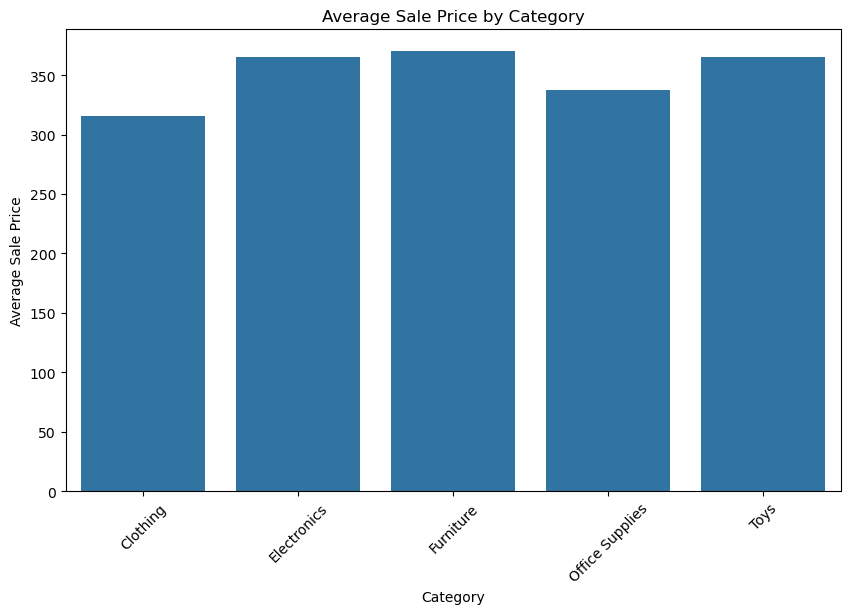

In [95]:

avg_sale_price_by_category = df.groupby('Category')['Sale_Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Sale_Price', data=avg_sale_price_by_category)
plt.title('Average Sale Price by Category')
plt.xlabel('Category')
plt.ylabel('Average Sale Price')
plt.xticks(rotation=45)
plt.show()


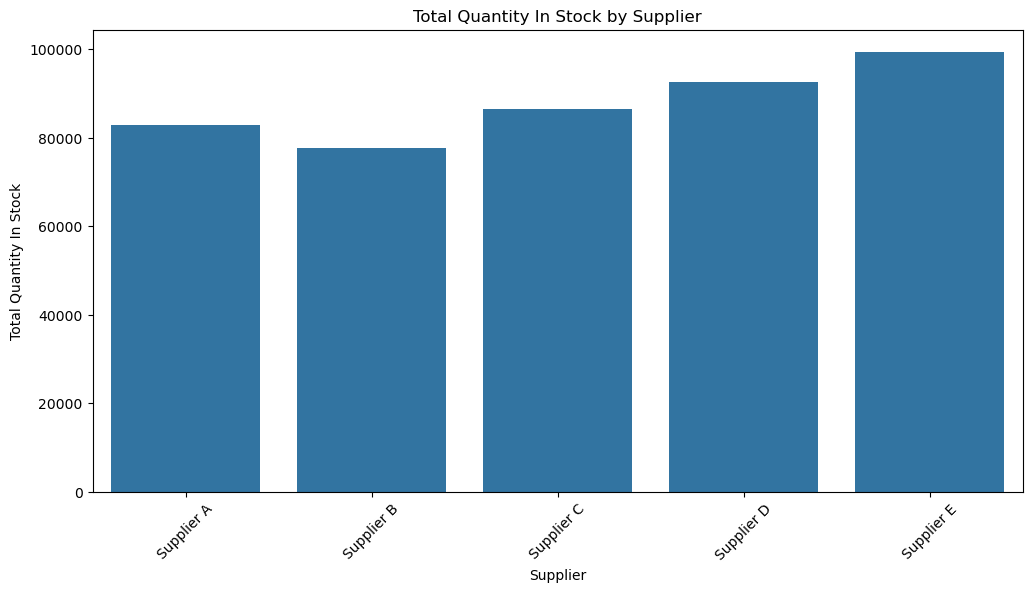

In [97]:

total_quantity_by_supplier = df.groupby('Supplier')['Quantity_In_Stock'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='Supplier', y='Quantity_In_Stock', data=total_quantity_by_supplier)
plt.title('Total Quantity In Stock by Supplier')
plt.xlabel('Supplier')
plt.ylabel('Total Quantity In Stock')
plt.xticks(rotation=45)
plt.show()
